<a href="https://colab.research.google.com/github/murpunk/Programming_2023/blob/main/03_04_23_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Список литературы

1.  К.В. Воронцов Математические методы обучения по прецедентам (теория 
обучения машин). 141 с. (Voron-ML-1.pdf)
2.  Машинное обучение (курс лекций, К.В.Воронцов): Линейный классификатор (machinelearning.ru), Метод стохастического градиента 
(machinelearning.ru) (“Линейные методы классификации и регрессии: метод 
стохастического градиента”: https://www.youtube.com/watch?v=thrPR77K-os)
3.  Рашка Себастьян, Мирджалили Вахид. Python и машинное обучение: машинное и глубокое обучение с использованием Python, scikit-learn и 
TensorFlow 2, 3-е изд.: Пер. с англ. СПб. : ООО "Диалектика", 2020. 848 с.
4.  Андреас Мюллер, Сара Гвидо. Введение в машинное обучение с помощью 
Python. Руководство для специалистов по работе с данными. 393 с.

Подробней см. в [1, стр. 51–62], [2], [3, стр. 49–84], [4].

Документация:
*  1.1. Linear Models — scikit-learn 1.1.3 documentation
*  1.5. Stochastic Gradient Descent — scikit-learn 1.1.3 documentation
*  sklearn.linear_model.LinearRegression — scikit-learn 1.1.3 documentation
*  sklearn.linear_model.Perceptron — scikit-learn 1.1.3 documentation

# I. Прочитайте пункт “Линейные методы регрессии и классификации” и рекомендованную литературу к нему и ответьте на вопросы

### 1) В каком виде ищется решение в задаче восстановления регрессии? На что влияет коэффициент $w_0$?

В задаче восстановления регрессии решение ищется в виде линейной функции — взвешенной суммы всех признаков: суммы всех признаков $f_i(x)$ с коэффицентами $w_i$, где $x$ входит в обучающую выборку.

$w_0$ — это дополнительный коэффицент, который смещает линейную функцию относительно начала координат.

Линейная модель восстановления регрессии в виде функции: $a(x, w) = \displaystyle\sum_{j=1}^{n} f_j(x)w_j + w_0$

### 2) Какой вид имеет функция потерь в методе наименьших квадратов?

Квадратичная функция потерь для каждой i-ой точки выглядит следующим образом:


$L(a, y) = (a_i - y_i)^2$, где $a$ — истинное значение выхода модели, а $y$ — фактический выход модели.

Если просуммировать значения функции потерь, получится функционал качества:


$Q(w) = \displaystyle\sum_{i=1}^{l} (a(x_i, w) - y_i)^2 \to {\underset{w}{min}}$
 
Он такой же, как в методе наименьших квадратов. Параметры регрессионной модели вычисляются таким образом, чтобы сумма квадратов расстояний от линии регрессии до фактических значений данных была минимальной.

### 3) Как в методе наименьших квадратов находится минимум?

В методе наименьших квадратов функционал качества сводится к нахождению минимума этой функции при условии равенства всех производных нулю. После дифференцирования задача сводится к решению СЛАУ, из которой находятся неизвестные коэффициенты $w_i$.

### 4) В каком виде ищется решение в задаче классификации? Какой геометрический смысл вектора коэффициентов $w$?

В задаче классификации решение ищется в виде функции знака числа от суммы всех  признаков $f_j(x)$ с коэффициентами $w_i$:

$a(x, w) = sign \langle x, w \rangle = sign\left(\displaystyle\sum_{j=1}^{n} f_j(x)w_j\right)$

Геометрический смысл состоит в том, что направляющий вектор коэффициентов $w$ разделяет гиперплоскость на два класса. Если точка лежит по одну сторону с вектором от гиперплоскости, то скалярное произведение будет больше нуля и точка попадает в класс +1. Если же лежит по другую сторону от вектора от гиперплоскости, то знак скалярного произведения меньше нуля и точка попадает в класс –1.

### 5) В чем недостаток использования пороговой функции потерь?

Пороговая функция потерь — это функция потерь, которая используется в задачах классификации и оптимизации. 

Недостатком пороговой функции потерь является то, что оне дифференцируема в некоторых точках. Это затрудняет её использование в некоторых алгоритмах, так как она не говорит о величине ошибки, функционал качества становится кусочной функцией.

### 6) Что такое отступ? Когда он бывает положительным и отрицательным? Какую еще информацию можно узнать с помощью него?

Вместо функции потерь используется её непрерывные аппроксимации:

$L(a, y) = [\langle x_i, w \rangle y_i < 0] \leqslant L(\langle x_i, w \rangle y_i)$,

где $\langle x_i, w \rangle y_i$ — это $M_i(w)$, то есть отступ объекта $x_i$. Если нет ошибки, то отступ становится положительным, а пороговая функция потерь становится равной 0. Если есть ошибка, отступ становится отрицательным, тогда пороговая функция потерь становится равной 1.

Отступ также говорит о расстоянии точки от гиперплоскости: чем дальше точка от гиперплоскости, тем больше модуль отступа.

### 7) Какие бывают функции потерь?

Чаще всего используются следующие функции потерь: простая, квадратичная и двоичная.

# II. Прочитайте пункт “Метод стохастического градиента” и рекомендованную литературу к нему и ответьте на вопросы

### 1) В чем отличия метода стохастического градиента от метода градиентного спуска?

**Градиентом** называется "наклон", который указывает, насколько крутой или неглубокой является линия (или функция) в определённой точке на n-мерной плоскости. "Крутой склон" указывает на высокую скорость изменения одного фактора по сравнению с другим фактором, в то время как обратное верно для "пологого склона".

Метод градиентного спуска работает так: выбирается начальная точка, в которой считается значение градиента, показывающий направление роста функции потерь в начальной точке, и делается шаг в противоположном градиенту направлении. Таким образом можно найти локальный минимум.

Стохастический градиентный спуск выбирает на каждом шаге случайный обучающий пример и вычисляет градиент функции потерь только по нему, а не как сумма градиентов от каждого элемента выборки. Так повышается сходимость алгоритма.

### 2) Зачем делается регуляризация?

Основным способом уменьшить переобучение является регуляризация, т.е. сокращение весов. За увеличение вектора весов применяется штраф, тогда функция потерь будет выглядеть следующим образом:

$Q(w) = \dfrac{1}{l} \displaystyle\sum_{j=1}^{l}L(\langle x_i, w\rangle y_i) + \dfrac{\tau}{2} \sum\limits_{j=1}^nw_j^2 \rightarrow \min\limits_w$, где $\tau$ $-$ коэффициент регуляризации.

### 3) Какие параметры можно задавать в методе стохастического градиента?

В методе стохастического градиента можно задавать начальный вектор параметров $w$ и темп обучения $h$.

### 4) Какие преимущества и недостатки метода стохастического градиента?

**Преимущества**:
*  метод легко реализуется;
*  метод подходит для динамического обучения, когда данные поступают потоком, а не все сразу;
*  случайной подвыборки может быть достаточно для обучения, поэтому веса можно настраивать для очень больших выборок (подходит для задач с большими данными).

**Недостатки**:
*  функционал качества может сходиться на локальном минимуме, а не на общем;
*  возможно переобучение при маленькой обучающей выборке.

# III. В книге [3, на стр. 49–67] рассказывается о модели нейрона Мак-Каллока–Питтса (предложенной ими в 1943 г.) и о правиле обучения персептрона Фрэнк Розенблатт (1957 г.)

На стр. 56–67 написана реализация алгоритма обучения персептрона на Python в виде класса Perceptron и обучение его на наборе данных Iris. Скопируйте код из книги и повторите эксперименты из неё.

In [91]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [92]:
iris = datasets.load_iris()
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [93]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [94]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [95]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [102]:
class Perceptron(object):
  def __init__ (self, eta = 0.01, n_iter = 50, random_state = 1): # задаются гиперпараметры
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1]) # веса после подгонки
    self.errors_ = [] # сохраняет количество ошибок после каждой эпохи

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, 0)

Извлекатеся первые сто меток классов, которые соответствуют нулю — это ирис разноцветный (iris-setosa) и единице — это ирис щетинистый (iris-versicolor).

In [103]:
X = iris.data[:100, [0, 2]] # первый столбец представляет длину чашелистника, а третий столбец — длину лепестка
y = iris.target[:100]
print('Class labels:', np.unique(y)) # 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica

Class labels: [0 1]


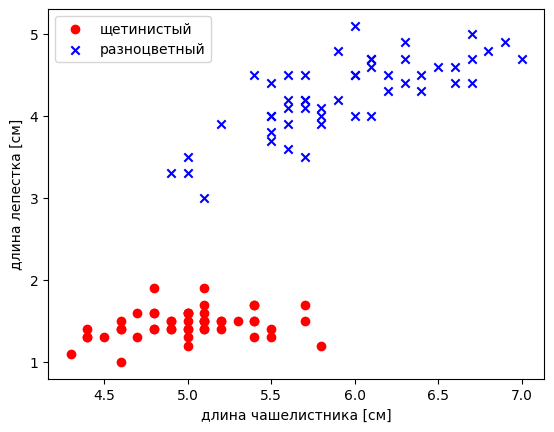

In [104]:
plt.scatter(X[:50, 0], X[:50, 1], color = "red", marker="o", label= "щетинистый")
plt.scatter(X[50:100, 0], X[50:100, 1], color = "blue", marker="x", label= "разноцветный")
plt.xlabel("длина чашелистника [см]")
plt.ylabel("длина лепестка [см]")
plt.legend(loc = "upper left")
plt.show()

Построим график ошибок неправильной классификации для каждой эпохи (относительно кличества эпох), чтобы проверить, сошёлся ли алгоритм

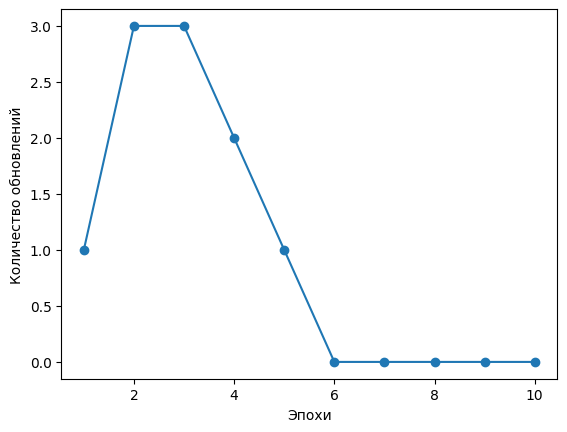

In [105]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = "o")
plt.xlabel("Эпохи")
plt.ylabel("Количество обновлений")
plt.show()

Функция, показывающая границу решений для двумерных наборов данных.

In [106]:
from matplotlib.colors import ListedColormap

In [107]:
def plot_decision_regions(X, y, classifier, resolution = 0.02):
  markers = ("s", "x", "o", "4", "4") # настраивается генератор маркеров
  colors = ("red", "blue", "lightgreen", "grey", "cyan") # настраивается карта цветов
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # вывести поверхность решения
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.xlim(xx1.min(), xx1.max())

  # вывести образцы по классам
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label = cl, edgecolor="black")

<ipython-input-107-2583381f5e7a>:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label = cl, edgecolor="black")


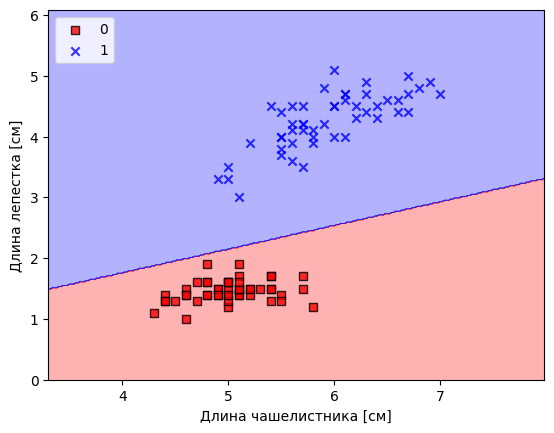

In [108]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("Длина чашелистника [см]")
plt.ylabel("Длина лепестка [см]")
plt.legend(loc = "upper left")
plt.show()

# IV. Выполните задание из файла statement-linear.pdf

### 1. Загрузите обучающую и тестовую выборки из файлов perceptron-train.csv и perceptron-test.csv. Целевая переменная записана в первом столбце, признаки — во втором и третьем

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import pandas as pd

In [47]:
prc_train = pd.read_csv("drive/My Drive/Программирование/perceptron-train.csv", header = None)
prc_train.head()

,0,1,2
0,-1.0,-0.024626,1174.600238
1,1.0,-0.978058,1083.198803
2,-1.0,0.314272,-1472.977609
3,-1.0,0.179752,231.017267
4,1.0,-1.262544,-778.271726


In [48]:
prc_test = pd.read_csv("drive/My Drive/Программирование/perceptron-test.csv", header = None)
prc_test.head()

,0,1,2
0,-1.0,1.651437,1337.453826
1,1.0,-0.866495,1191.232457
2,-1.0,0.789828,-475.647768
3,-1.0,0.179549,1959.095353
4,1.0,-0.434351,568.504207


In [51]:
X_train = prc_train.loc[:, 1:] # признаки
y_train = prc_train[0] # целевая переменная
X_test = prc_test.loc[:, 1:]
y_test = prc_test[0]

### 2. Обучите персептрон со стандартными параметрами и random_state=241

In [69]:
from sklearn.linear_model import Perceptron

In [70]:
clf = Perceptron(random_state=241)
clf.fit(X_train, y_train)

Perceptron(random_state=241)

In [71]:
predict_answers = clf.predict(X_test)

### 3. Подсчитайте качество (долю правильно классифицированных объектов, accuracy) полученного классификатора на тестовой выборке

In [72]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy = accuracy_score(y_test, predict_answers) # качество на тестовой выборке
print(f"Качество на тестовой выборке: {accuracy}.")

Качество на тестовой выборке: 0.655.


### 4. Нормализуйте обучающую и тестовую выборку с помощью класса StandardScaler

In [74]:
from sklearn.preprocessing import StandardScaler

Нормализуем обучающую и тестовую выборки:

In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5. Обучите персептрон на новых выборках. Найдите долю правильных ответов на тестовой выборке

In [82]:
clf.fit(X_train_scaled, y_train)
predict_answers_scaled = clf.predict(X_test_scaled)

In [88]:
accuracy_after_scale = accuracy_score(y_test, predict_answers_scaled)
print(f"Качество на тестовой выборке: {accuracy_scaled}.")

Качество на тестовой выборке: 0.725.


### 6. Найдите разность между качеством на тестовой выборке после нормализации и качеством до нее. Это число и будет ответом на задание

In [89]:
accuracy_difference = round(accuracy_after_scale - accuracy, 3)
print(f"Разность между качество на тестовой выборке после нормализации и до неё: {accuracy_difference}.")

Разность между качество на тестовой выборке после нормализации и до неё: 0.07.
